In [452]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [453]:
# Caso a imagem tenha 3 dimensões, há uma modificação para 2 dimensões
image = plt.imread('image.jpg')
print(image.shape)

if len(image.shape) == 3:
    x, y, z = image.shape
    image = image.reshape(x, y*z)

(480, 481, 3)


A imagem é dividida em i linhas e j colunas. A partir daí, iniciamos a decomposição de componentes principais utilizando PCA.

sklearn.decomposition.PCA( \
    n_components = NONE, \
    copy = True, \
    whiten = False, \
    svd_solver = 'auto', \
    tol = 0.0, \
    iterated_power = 'auto', \
    n_oversamples = 10, \
    power_iteration_normalizer = 'auto', \
    rando_state = None \
)

In [454]:
# n_components determina o número de componentes para explicar o conjunto de dados. Para verificar qual a variância explicada,
# consultar em .explained_variance_ratio_
pca_numcomponents = PCA(n_components=5)
pca_image = pca_numcomponents.fit_transform(image)
image_pca = pca_numcomponents.inverse_transform(pca_image)

In [455]:
# Inserindo o valor, o PCA irá determinar o número de componentes necessários para atingir a variância inserida
pca_varianceratio = PCA(0.99)
pca_image_1 = pca_varianceratio.fit_transform(image)
image_pca_1 = pca_varianceratio.inverse_transform(pca_image_1)

In [456]:
data = {'Tipo PCA': ['PCA n_components', 'PCA variancia'],
       'Número de componentes': [pca_numcomponents.n_components_, pca_varianceratio.n_components_],
       'Variância explicada': [pca_numcomponents.explained_variance_ratio_.sum()*100, pca_varianceratio.explained_variance_ratio_.sum()*100]}

In [457]:
# Data frame mostrando o número de componentes e a variância explicada em para cada forma de trabalhar com PCA()
df_pca = pd.DataFrame(data)
df_pca

,Tipo PCA,Número de componentes,Variância explicada
0,PCA n_components,5,76.450982
1,PCA variancia,95,99.014139


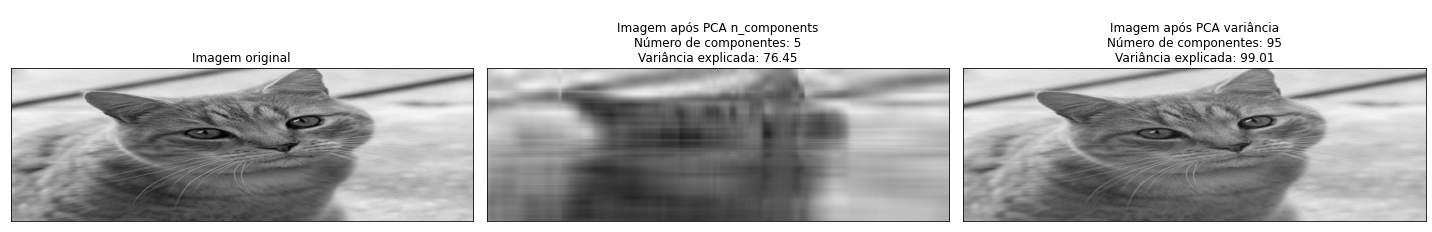

In [458]:
plt.figure(figsize=(20,20))

plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')
plt.title('Imagem original')
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,2)
plt.imshow(image_pca, cmap='gray')
plt.title(f"""
Imagem após PCA n_components
Número de componentes: {pca_numcomponents.n_components_}
Variância explicada: {pca_numcomponents.explained_variance_ratio_.sum()*100:.2f}""")
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,3)
plt.imshow(image_pca_1, cmap='gray')
plt.title(f"""
Imagem após PCA variância
Número de componentes: {pca_varianceratio.n_components_}
Variância explicada: {pca_varianceratio.explained_variance_ratio_.sum()*100:.2f}""")
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()